In [1]:
#Important imports
import torch
from torch import nn as nn
from torch.utils.data import DataLoader
from torch import optim 
import matplotlib.pyplot as plt
from torch.nn import functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms,models
import matplotlib.pyplot as plt

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
transformations = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [3]:
train_data = ImageFolder(r'D:\ComputerVisionCamp\SkinCancer\train', transform = transformations)
test_data = ImageFolder(r'D:\ComputerVisionCamp\SkinCancer\test', transform = transformations)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


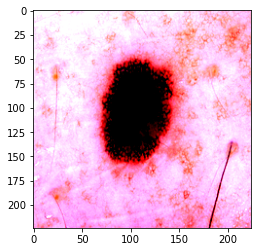

In [4]:
plt.imshow((train_data[0][0]).permute(1,2,0))

In [5]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
              
        self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, padding=1)
        
        self.pool1 = nn.MaxPool2d(2)
        
                
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1)
        
        self.pool2 = nn.MaxPool2d(2)
        
               
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, padding = 1)
        
        self.pool3 = nn.MaxPool2d(2)
               
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(128*28*28,256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,1)
    
    def forward(self, x):
        out = self.pool1(F.relu(self.conv1(x)))
        out = self.pool2(F.relu(self.conv2(out)))
        out = self.pool3(F.relu(self.conv3(out)))
        
        out = self.flatten(out)
        
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = torch.sigmoid(self.fc3(out))
        
        return out

In [6]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):

    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)

    for epoch in range(n_epochs):

        for example, labels in train_loader:     

            example = example.to(DEVICE)
            labels = labels.to(DEVICE)

            labels  = labels.unsqueeze(1)

            output = model(example.float())
            loss = loss_fn(output, labels.float())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
        with torch.no_grad():
            
            for loader, accuracy in [(train_loader, train_accuracy),(test_loader, test_accuracy)]:
                correct = 0
                total = 0

                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)

                    outputs = model(examples.float())
                    predicted = torch.round(outputs)

                    total += labels.shape[0]
                    correct += (predicted == labels).sum()

                accuracy[epoch] = correct / total
                
        print(f'Epoch {epoch+1})', 
              f'Train Accuracy: {train_accuracy[epoch]}',
              f'Test Accuracy: {test_accuracy[epoch]}')

    if print_plot:

        epochs = range(n_epochs)

        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [7]:
train_loader = DataLoader(train_data, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle=True)

Epoch 1) Train Accuracy: 0.8069776296615601 Test Accuracy: 0.8090909123420715
Epoch 2) Train Accuracy: 0.8304892182350159 Test Accuracy: 0.8348484635353088
Epoch 3) Train Accuracy: 0.8175957798957825 Test Accuracy: 0.810606062412262
Epoch 4) Train Accuracy: 0.8805460929870605 Test Accuracy: 0.8363636136054993
Epoch 5) Train Accuracy: 0.8968524932861328 Test Accuracy: 0.8348484635353088
Epoch 6) Train Accuracy: 0.9271900057792664 Test Accuracy: 0.8348484635353088
Epoch 7) Train Accuracy: 0.9628365635871887 Test Accuracy: 0.8272727131843567
Epoch 8) Train Accuracy: 0.9704209566116333 Test Accuracy: 0.8348484635353088
Epoch 9) Train Accuracy: 0.958285927772522 Test Accuracy: 0.8090909123420715
Epoch 10) Train Accuracy: 0.9893818497657776 Test Accuracy: 0.8409090638160706


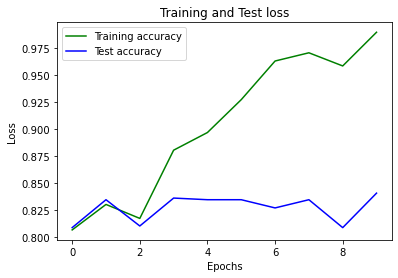

In [8]:
learning_rate = 1e-3 # 0.001

model = Net().to(DEVICE)

optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

Epoch 1) Train Accuracy: 0.8001517057418823 Test Accuracy: 0.7848485112190247
Epoch 2) Train Accuracy: 0.8331437110900879 Test Accuracy: 0.8196969628334045


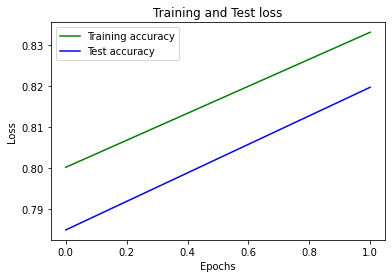

In [12]:
learning_rate = 1e-3 # 0.001

model = Net().to(DEVICE)

optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 2,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth



Epoch 1) Train Accuracy: 0.7921881079673767 Test Accuracy: 0.7833333611488342
Epoch 2) Train Accuracy: 0.8248009085655212 Test Accuracy: 0.8378787636756897
Epoch 3) Train Accuracy: 0.8437618613243103 Test Accuracy: 0.8348484635353088
Epoch 4) Train Accuracy: 0.8339021801948547 Test Accuracy: 0.8242424130439758
Epoch 5) Train Accuracy: 0.8441410660743713 Test Accuracy: 0.8333333134651184
Epoch 6) Train Accuracy: 0.8581721782684326 Test Accuracy: 0.8409090638160706
Epoch 7) Train Accuracy: 0.8308684229850769 Test Accuracy: 0.8090909123420715
Epoch 8) Train Accuracy: 0.873720109462738 Test Accuracy: 0.8545454740524292
Epoch 9) Train Accuracy: 0.8847174644470215 Test Accuracy: 0.8666666746139526
Epoch 10) Train Accuracy: 0.8832005858421326 Test Accuracy: 0.8787878751754761


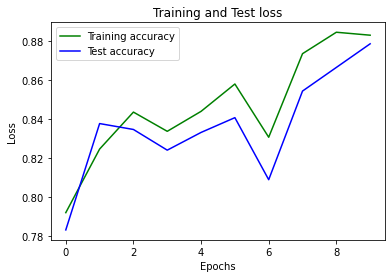

In [10]:
from collections import OrderedDict

model = models.resnet50(pretrained = True)

for param in model.parameters():
    param.required_grad = False
    
nr_feat = model.fc.in_features #2048
model.fc = nn.Sequential(OrderedDict([('fc',nn.Linear(nr_feat,1)),('sigmoid',nn.Sigmoid())]))

learning_rate = 1e-3
model = model.to(DEVICE)
optimizer = optim.Adam(model.parameters(),lr = learning_rate)
loss_fn = nn.BCELoss()


training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)

In [11]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 